<a href="https://colab.research.google.com/github/elainepajarillo/CS142/blob/main/ANG_PAJARILLO__CS142_MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Programming (Bottom Up)

In [ ]:
#NOT EDITED YET
#SOURCE: https://github.com/AndrewGEvans95/Knapsack

import random
import time

# seed function - same random inputs are generated each time
random.seed(42)

# knapsack capacity
W = 1000

# random weights and values
def generate_items(n):
    weights = [random.randint(100, 1500) for _ in range(n)]
    values = [random.randint(100, 500) for _ in range(n)]
    return list(zip(weights, values))

# knapsack function
def knapSack(W, wt, val, n):
    V = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(W + 1):
            if wt[i - 1] <= w:
                V[i][w] = max(val[i - 1] + V[i - 1][w - wt[i - 1]], V[i - 1][w])
            else:
                V[i][w] = V[i - 1][w]

    # return max value
    return V[n][W]

#runtime
def measure_runtime(n):
    items = generate_items(n)
    wt, val = zip(*items)

    start_time = time.time()
    result = knapSack(W, wt, val, n)
    end_time = time.time()

    runtime = end_time - start_time
    return result, runtime

#different n values
n_values = [100, 1000, 10000, 50000, 100000]
for n in n_values:
    result, runtime = measure_runtime(n)
    print(f"n = {n}, Maximum Value = {result}, Runtime = {runtime:.4f} seconds")

n = 100, Maximum Value = 2381, Runtime = 0.0383 seconds
n = 1000, Maximum Value = 3526, Runtime = 0.3498 seconds
n = 10000, Maximum Value = 4393, Runtime = 5.0390 seconds
n = 50000, Maximum Value = 4493, Runtime = 20.8148 seconds
n = 100000, Maximum Value = 4659, Runtime = 42.7341 seconds


Trial 1:
n = 100, Maximum Value = 1585, Runtime = 0.0321 seconds
n = 1000, Maximum Value = 3638, Runtime = 0.3256 seconds
n = 10000, Maximum Value = 4375, Runtime = 3.6026 seconds
n = 100000, Maximum Value = 4681, Runtime = 39.9595 seconds
Trial 2:
n = 100, Maximum Value = 2011, Runtime = 0.0320 seconds
n = 1000, Maximum Value = 3979, Runtime = 0.3282 seconds
n = 10000, Maximum Value = 4454, Runtime = 5.2753 seconds
n = 100000, Maximum Value = 4781, Runtime = 39.8719 seconds
Trial 3:
n = 100, Maximum Value = 2495, Runtime = 0.0330 seconds
n = 1000, Maximum Value = 3659, Runtime = 0.3224 seconds
n = 10000, Maximum Value = 4405, Runtime = 3.6224 seconds
n = 100000, Maximum Value = 4836, Runtime = 39.9293 seconds


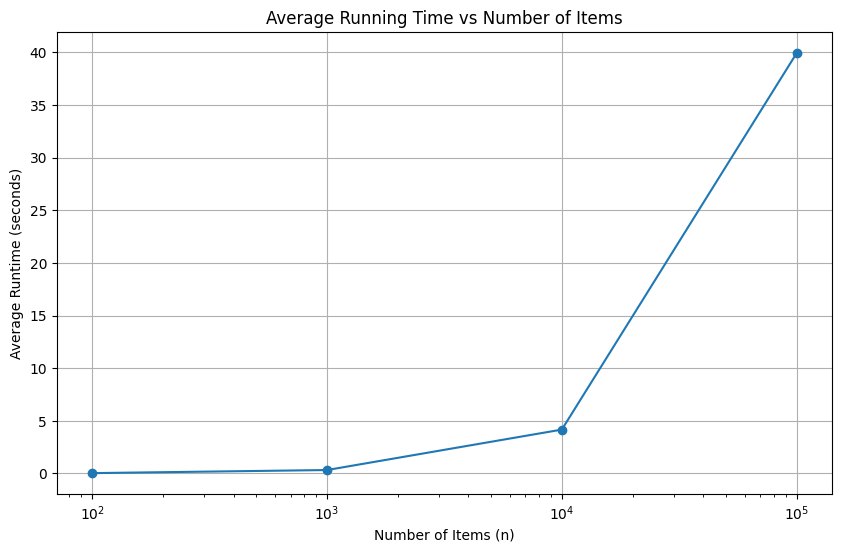

In [ ]:
import random
import time
import pickle
import matplotlib.pyplot as plt

#seed fcn - same random inputs generated
random.seed(42)

W = 1000 #knapsack capacity

#generate random weights and values (save for reuse)
def item_save_function(n, num_trials=3):
    for trial in range(1, num_trials + 1):
        random.seed(42 + trial)  #diff seed per trial
        weights = [random.randint(100, 1500) for _ in range(n)]
        values = [random.randint(100, 500) for _ in range(n)]
        items = list(zip(weights, values))
        filename = f"items_trial{trial}.pkl"  #save data (for reuse in other algos)
        with open(filename, "wb") as f:
            pickle.dump(items, f)

#load pre-saved items for each trial
def load_items(trial):
    filename = f"items_trial{trial}.pkl"
    with open(filename, "rb") as f:
        items = pickle.load(f)
    return items

def knapSack(W, wt, val, n):
    # Create dp table
    V = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(W + 1):
            if wt[i - 1] <= w:
                V[i][w] = max(val[i - 1] + V[i - 1][w - wt[i - 1]], V[i - 1][w])
            else:
                V[i][w] = V[i - 1][w]

    #return max val
    return V[n][W]

#runtime
def measure_runtime(trial, n):
    items = load_items(trial)
    wt, val = zip(*items)

    start_time = time.time()
    result = knapSack(W, wt, val, n)
    end_time = time.time()

    runtime = end_time - start_time
    return result, runtime

#different n values
n_values = [100, 1000, 10000, 100000]
num_trials = 3

for n in n_values:
    item_save_function(n, num_trials)

average_runtimes = {n: [] for n in n_values}

for trial in range(1, num_trials + 1):
    print(f"Trial {trial}:")
    for n in n_values:
        result, runtime = measure_runtime(trial, n)
        average_runtimes[n].append(runtime)
        print(f"n = {n}, Maximum Value = {result}, Runtime = {runtime:.4f} seconds")

#averaging and plotting
average_runtimes = {n: sum(times) / len(times) for n, times in average_runtimes.items()}

plt.figure(figsize=(10, 6))
plt.plot(list(average_runtimes.keys()), list(average_runtimes.values()), marker='o')
plt.title('Average Running Time vs Number of Items')
plt.xlabel('Number of Items (n)')
plt.ylabel('Average Runtime (seconds)')
plt.xscale('log')
plt.grid(True)
plt.xticks(list(average_runtimes.keys()))
plt.show()

# Dynamic Programming (Top Down)

In [ ]:
#NOT EDITED YET
#SOURCE: https://gist.github.com/harishv7/1bb7fa7acba8e741fbfbe5075106926b
def knap_sack_top_down(w, weights, values, n):
    if(store[n-1][w] is not None):
        return store[n-1][w]

    result = None

    if(n == 0 or w == 0):
        result = 0
    elif(weights[n-1] > w):
        result = knap_sack_top_down(w, weights, values, n-1)
    else:
        result = max(values[n-1] + knap_sack_top_down(w - weights[n-1], weights, values, n-1),
                    knap_sack_top_down(w, weights, values, n-1))
    store[n-1][w] = result
    return result

values = [60, 100, 120]
weights = [10, 20, 30]
w = 50
n = len(values)

store = [[None for x in range(w+1)] for x in range(n+1)]
print(knap_sack_top_down(w, weights, values, n))

Trial 1:
n = 100, Maximum Value = 1837, Runtime = 0.0609 seconds
n = 1000, Maximum Value = 3758, Runtime = 0.9859 seconds
n = 10000, Maximum Value = 4376, Runtime = 14.9485 seconds
Trial 2:
n = 100, Maximum Value = 2374, Runtime = 0.0156 seconds
n = 1000, Maximum Value = 3740, Runtime = 0.5718 seconds
n = 10000, Maximum Value = 4460, Runtime = 15.6926 seconds
Trial 3:
n = 100, Maximum Value = 2277, Runtime = 0.0176 seconds
n = 1000, Maximum Value = 3654, Runtime = 0.5497 seconds
n = 10000, Maximum Value = 4442, Runtime = 15.5719 seconds


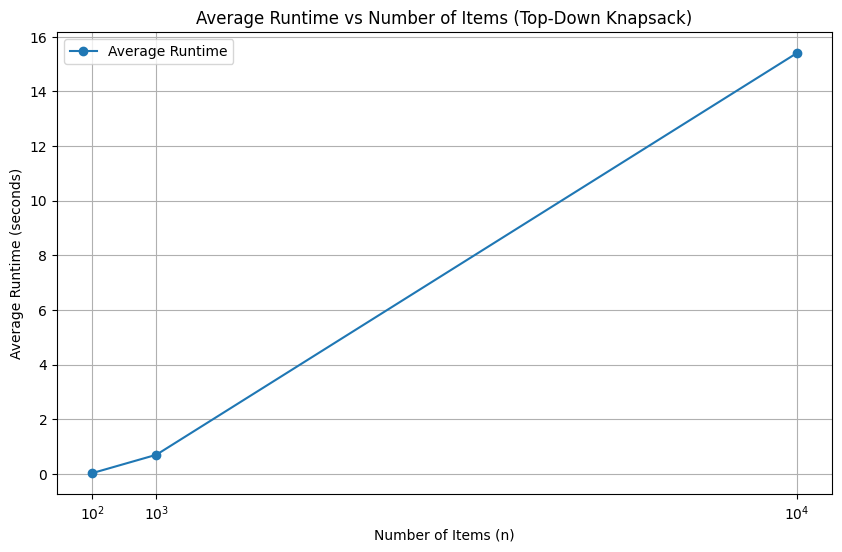

In [ ]:
import random
import time
import pickle
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(1000000)

random.seed(42)

#knapsack capacity
W = 1000

def save_items_for_trials(n, num_trials=3):
    for trial in range(1, num_trials + 1):
        random.seed(42 + trial)  # Different seed for each trial
        weights = [random.randint(100, 1500) for _ in range(n)]
        values = [random.randint(100, 500) for _ in range(n)]
        items = list(zip(weights, values))
        filename = f"items_trial{trial}.pkl"
        with open(filename, "wb") as f:
            pickle.dump(items, f)

def load_items(trial):
    filename = f"items_trial{trial}.pkl"
    with open(filename, "rb") as f:
        items = pickle.load(f)
    return items

#knapsack dp top-down approach
def knap_sack_top_down(w, weights, values, n, store):
    if n == 0 or w == 0:
        return 0
    if store[n][w] is not None:
        return store[n][w]

    if weights[n - 1] > w:
        result = knap_sack_top_down(w, weights, values, n - 1, store)
    else:
        result = max(values[n - 1] + knap_sack_top_down(w - weights[n - 1], weights, values, n - 1, store),
                     knap_sack_top_down(w, weights, values, n - 1, store))

    store[n][w] = result
    return result

#runtime
def measure_runtime_top_down(trial, n):
    items = load_items(trial)
    weights, values = zip(*items)

    #memoization table
    store = [[None for _ in range(W + 1)] for _ in range(n + 1)]

    start_time = time.time()
    result = knap_sack_top_down(W, weights, values, n, store)
    end_time = time.time()

    runtime = end_time - start_time
    return result, runtime

#plotting
def plot_average_runtimes(n_values, avg_runtimes, title):
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, avg_runtimes, marker='o', label='Average Runtime')
    plt.xlabel('Number of Items (n)')
    plt.ylabel('Average Runtime (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(n_values, labels=[f"$10^{int(len(str(n))-1)}$" for n in n_values])  # Set custom tick labels
    plt.show()

#trials
n_values = [100, 1000, 10000]
num_trials = 3

for n in n_values:
    save_items_for_trials(n, num_trials)

runtimes = {n: [] for n in n_values}
for trial in range(1, num_trials + 1):
    print(f"Trial {trial}:")
    for n in n_values:
        result, runtime = measure_runtime_top_down(trial, n)
        runtimes[n].append(runtime)
        print(f"n = {n}, Maximum Value = {result}, Runtime = {runtime:.4f} seconds")

#averaging runtimes
avg_runtimes = [sum(runtimes[n]) / num_trials for n in n_values]

#plotting
plot_average_runtimes(n_values, avg_runtimes, "Average Runtime vs Number of Items (Top-Down Knapsack)")

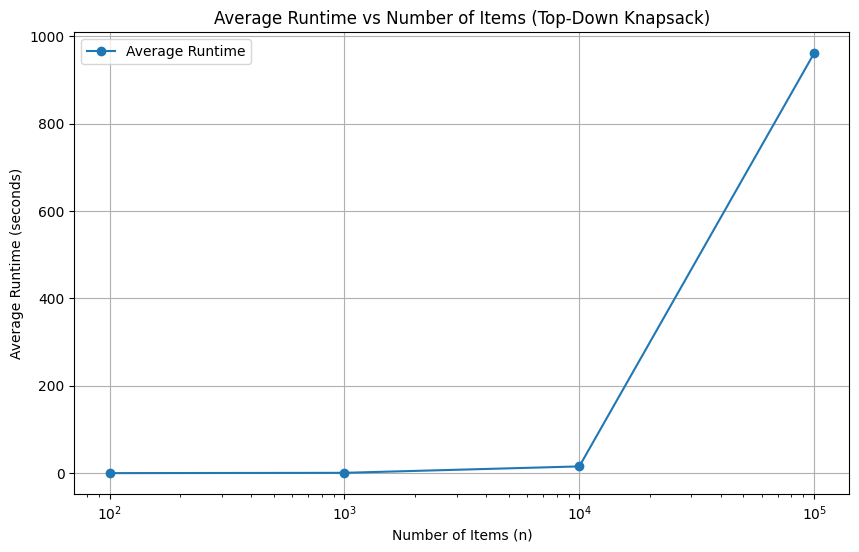

In [ ]:
#CODE FOR PLOTTING FULL DP TOPDOWN GRAPH
import matplotlib.pyplot as plt

n_values = [100, 1000, 10000, 100000]
avg_runtimes = [0.0314, 0.7025, 15.4043, 961.6658]

def plot_average_runtimes(n_values, avg_runtimes, title):
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, avg_runtimes, marker='o', label='Average Runtime')
    plt.xlabel('Number of Items (n)')
    plt.ylabel('Average Runtime (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(
        n_values,
        labels=[f"$10^{int(len(str(n))-1)}$" for n in n_values]
    )
    plt.xscale("log")
    plt.show()

plot_average_runtimes(n_values, avg_runtimes, "Average Runtime vs Number of Items (Top-Down Knapsack)")


# Dynamic Programming Combined

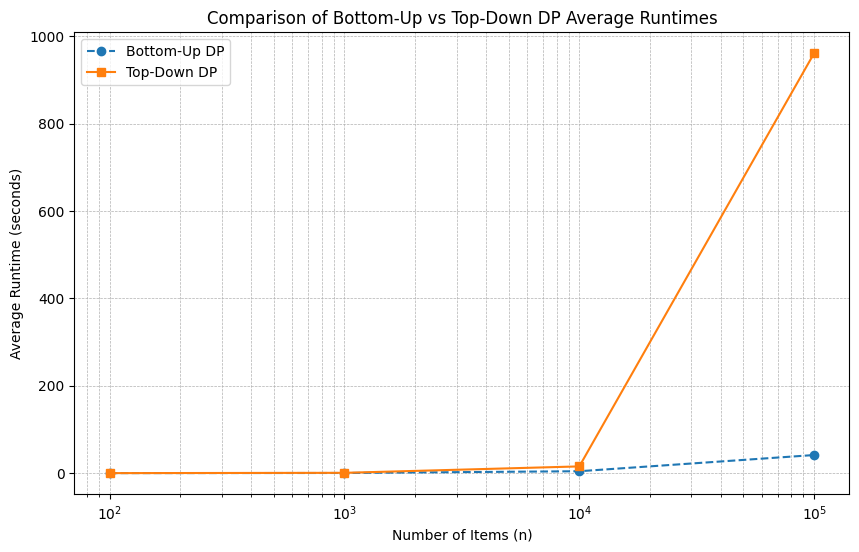

In [ ]:
import matplotlib.pyplot as plt

#Bottom-Up DP data
n_values_bottom_up = [100, 1000, 10000, 100000]
avg_runtimes_bottom_up = [0.03143333333, 0.3578666667, 4.3552333333, 41.4598333333]

#Top-Down DP data
n_values_top_down = [100, 1000, 10000, 100000]
avg_runtimes_top_down = [0.0314, 0.7025, 15.4043, 961.6658]

def plot_comparison(n_values, runtimes_bottom_up, runtimes_top_down, title):
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, runtimes_bottom_up, marker='o', label='Bottom-Up DP', linestyle='--')
    plt.plot(n_values, runtimes_top_down, marker='s', label='Top-Down DP', linestyle='-')
    plt.xlabel('Number of Items (n)')
    plt.ylabel('Average Runtime (seconds)')
    plt.title(title)
    plt.xscale("log")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

#Plotting
plot_comparison(
    n_values_bottom_up,
    avg_runtimes_bottom_up,
    avg_runtimes_top_down,
    "Comparison of Bottom-Up vs Top-Down DP Average Runtimes"
)


# Greedy 1 (Largest Value)

**Greedy Code are the same for all 3 variations, with the exception of the 2nd line in the *knapsack_greedy_weight* function that sorts the items.**

Trial 1:
n = 100, Maximum Value = 1219, Runtime = 0.0000 seconds
n = 1000, Maximum Value = 999, Runtime = 0.0003 seconds
n = 10000, Maximum Value = 1500, Runtime = 0.0049 seconds
n = 100000, Maximum Value = 1000, Runtime = 0.0552 seconds
Trial 2:
n = 100, Maximum Value = 1412, Runtime = 0.0001 seconds
n = 1000, Maximum Value = 1000, Runtime = 0.0005 seconds
n = 10000, Maximum Value = 1000, Runtime = 0.0036 seconds
n = 100000, Maximum Value = 1000, Runtime = 0.0560 seconds
Trial 3:
n = 100, Maximum Value = 497, Runtime = 0.0001 seconds
n = 1000, Maximum Value = 1990, Runtime = 0.0003 seconds
n = 10000, Maximum Value = 500, Runtime = 0.0036 seconds
n = 100000, Maximum Value = 500, Runtime = 0.0564 seconds


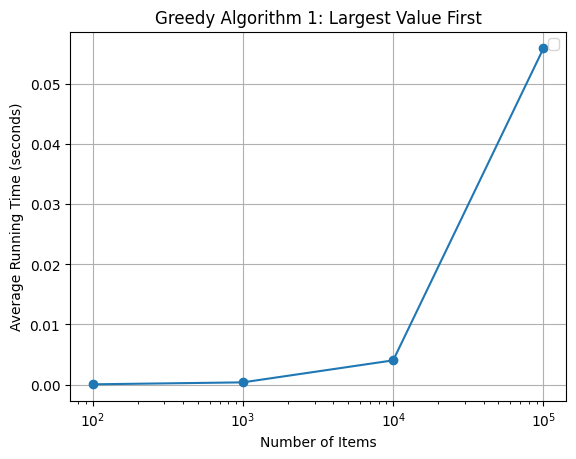

In [ ]:
# SOURCE (with some modification): https://github.com/javiribera/greedy-knapsack
# still have to check

import random
import time
import matplotlib.pyplot as plt

def knapsack_greedy_weight(items, max_weight):
    items_sorted = sorted(items, key=lambda x: x[1], reverse=True)                # Sort by weight first then reverse
    knapsack, total_weight, total_value = [], 0, 0

    for item in items_sorted:
        if total_weight + item[0] <= max_weight:
            knapsack.append(item)
            total_weight += item[0]
            total_value += item[1]

    return knapsack, total_weight, total_value

# Experiment with 3 trials each
def run_experiment_value(item_counts, max_weight=1000):
    results = []
    for trial in range(3):
        trial_results = []
        for n in item_counts:
            items = [(random.randint(100, 1500), random.randint(100, 500)) for _ in range(n)]
            start_time = time.time()
            _, _, max_value = knapsack_greedy_weight(items, max_weight)
            runtime = time.time() - start_time
            trial_results.append((n, max_value, runtime))
        results.append(trial_results)
    print_experiment_results(results)
    return results

# Print results
def print_experiment_results(results):
    for trial_index, trial_results in enumerate(results):
        print(f"Trial {trial_index + 1}:")
        for n, max_value, runtime in trial_results:
            print(f"n = {n}, Maximum Value = {max_value}, Runtime = {runtime:.4f} seconds")

# Test parameters
item_counts = [100, 1000, 10000,  100000]
results_value = run_experiment_value(item_counts)

# Visualization
plt.plot(item_counts, [sum(trial[i][2] for trial in results_value) / len(results_value) for i in range(len(item_counts))],
         marker='o')
plt.xlabel("Number of Items")
plt.ylabel("Average Running Time (seconds)")
plt.title("Greedy Algorithm 1: Largest Value First")
plt.legend()
plt.xscale("log")
plt.grid()
plt.show()



# Greedy 2 (Smallest Size)

Trial 1:
n = 100, Maximum Value = 2136, Runtime = 0.0001 seconds
n = 1000, Maximum Value = 2426, Runtime = 0.0005 seconds
n = 10000, Maximum Value = 2870, Runtime = 0.0045 seconds
n = 100000, Maximum Value = 2641, Runtime = 0.0619 seconds
Trial 2:
n = 100, Maximum Value = 1050, Runtime = 0.0001 seconds
n = 1000, Maximum Value = 3415, Runtime = 0.0003 seconds
n = 10000, Maximum Value = 2880, Runtime = 0.0037 seconds
n = 100000, Maximum Value = 3537, Runtime = 0.0630 seconds
Trial 3:
n = 100, Maximum Value = 1658, Runtime = 0.0006 seconds
n = 1000, Maximum Value = 2521, Runtime = 0.0003 seconds
n = 10000, Maximum Value = 3007, Runtime = 0.0040 seconds
n = 100000, Maximum Value = 3221, Runtime = 0.0610 seconds


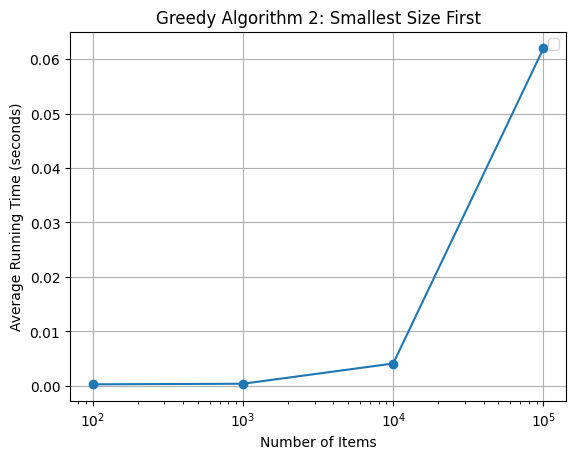

In [ ]:
import random
import time
import matplotlib.pyplot as plt

def knapsack_greedy_weight(items, max_weight):
    items_sorted = sorted(items, key=lambda x: x[0])                              # Sort by weight (smallest first)
    knapsack, total_weight, total_value = [], 0, 0

    for item in items_sorted:
        if total_weight + item[0] <= max_weight:
            knapsack.append(item)
            total_weight += item[0]
            total_value += item[1]

    return knapsack, total_weight, total_value

# Experiment with 3 trials each
def run_experiment_weight(item_counts, max_weight=1000):
    results = []
    for trial in range(3):
        trial_results = []
        for n in item_counts:
            items = [(random.randint(100, 1500), random.randint(100, 500)) for _ in range(n)]
            start_time = time.time()
            _, _, max_value = knapsack_greedy_weight(items, max_weight)
            runtime = time.time() - start_time
            trial_results.append((n, max_value, runtime))
        results.append(trial_results)
    print_experiment_results(results)
    return results

# Print results
def print_experiment_results(results):
    for trial_index, trial_results in enumerate(results):
        print(f"Trial {trial_index + 1}:")
        for n, max_value, runtime in trial_results:
            print(f"n = {n}, Maximum Value = {max_value}, Runtime = {runtime:.4f} seconds")

# Test parameters
item_counts = [100, 1000, 10000, 100000]
results_weight = run_experiment_weight(item_counts)

# Visualization
plt.plot(item_counts, [sum(trial[i][2] for trial in results_weight) / len(results_weight) for i in range(len(item_counts))],
         marker='o')
plt.xlabel("Number of Items")
plt.ylabel("Average Running Time (seconds)")
plt.title("Greedy Algorithm 2: Smallest Size First")
plt.legend()
plt.xscale("log")
plt.grid()
plt.show()


# Greedy 3 (Approximation)

Trial 1:
n = 100, Maximum Value = 2455, Runtime = 0.0001 seconds
n = 1000, Maximum Value = 3949, Runtime = 0.0007 seconds
n = 10000, Maximum Value = 4392, Runtime = 0.0082 seconds
n = 100000, Maximum Value = 4449, Runtime = 0.1196 seconds
Trial 2:
n = 100, Maximum Value = 2386, Runtime = 0.0002 seconds
n = 1000, Maximum Value = 3319, Runtime = 0.0007 seconds
n = 10000, Maximum Value = 4348, Runtime = 0.0079 seconds
n = 100000, Maximum Value = 4446, Runtime = 0.1106 seconds
Trial 3:
n = 100, Maximum Value = 1719, Runtime = 0.0001 seconds
n = 1000, Maximum Value = 3437, Runtime = 0.0007 seconds
n = 10000, Maximum Value = 4393, Runtime = 0.0091 seconds
n = 100000, Maximum Value = 4474, Runtime = 0.1238 seconds


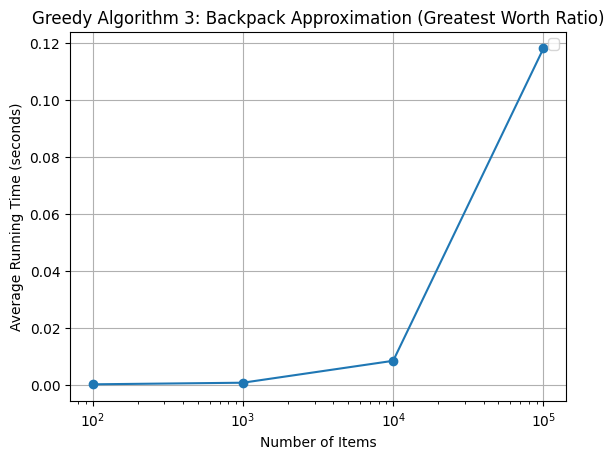

In [ ]:
import random
import time
import matplotlib.pyplot as plt

def knapsack_greedy_weight(items, max_weight):
    items_sorted = sorted(items, key=lambda x: x[1] / x[0] if x[0] > 0 else 0, reverse=True)  # Sort by value/weight
    knapsack, total_weight, total_value = [], 0, 0

    for item in items_sorted:
        if total_weight + item[0] <= max_weight:
            knapsack.append(item)
            total_weight += item[0]
            total_value += item[1]

    return knapsack, total_weight, total_value

# Experiment with 3 trials each
def run_experiment_weight(item_counts, max_weight=1000):
    results = []
    for trial in range(3):
        trial_results = []
        for n in item_counts:
            items = [(random.randint(100, 1500), random.randint(100, 500)) for _ in range(n)]
            start_time = time.time()
            _, _, max_value = knapsack_greedy_weight(items, max_weight)
            runtime = time.time() - start_time
            trial_results.append((n, max_value, runtime))
        results.append(trial_results)
    print_experiment_results(results)
    return results

# Print results
def print_experiment_results(results):
    for trial_index, trial_results in enumerate(results):
        print(f"Trial {trial_index + 1}:")
        for n, max_value, runtime in trial_results:
            print(f"n = {n}, Maximum Value = {max_value}, Runtime = {runtime:.4f} seconds")

# Test parameters
item_counts = [100, 1000, 10000,  100000]
results_weight = run_experiment_weight(item_counts)

# Visualization
plt.plot(item_counts, [sum(trial[i][2] for trial in results_weight) / len(results_weight) for i in range(len(item_counts))],
         marker='o')
plt.xlabel("Number of Items")
plt.ylabel("Average Running Time (seconds)")
plt.title("Greedy Algorithm 3: Backpack Approximation (Greatest Worth Ratio)")
plt.legend()
plt.xscale("log")
plt.grid()
plt.show()


# Greedy code combined


 Results for Largest Value First :

Trial 1:
n = 100, Maximum Value = 990, Runtime = 0.0000 seconds
n = 1000, Maximum Value = 499, Runtime = 0.0003 seconds
n = 10000, Maximum Value = 1500, Runtime = 0.0038 seconds
n = 100000, Maximum Value = 1500, Runtime = 0.0537 seconds

Trial 2:
n = 100, Maximum Value = 488, Runtime = 0.0000 seconds
n = 1000, Maximum Value = 996, Runtime = 0.0003 seconds
n = 10000, Maximum Value = 1500, Runtime = 0.0037 seconds
n = 100000, Maximum Value = 2000, Runtime = 0.0558 seconds

Trial 3:
n = 100, Maximum Value = 1397, Runtime = 0.0001 seconds
n = 1000, Maximum Value = 1985, Runtime = 0.0003 seconds
n = 10000, Maximum Value = 1000, Runtime = 0.0036 seconds
n = 100000, Maximum Value = 1000, Runtime = 0.0596 seconds

 Results for Smallest Weight First :

Trial 1:
n = 100, Maximum Value = 1776, Runtime = 0.0001 seconds
n = 1000, Maximum Value = 2819, Runtime = 0.0003 seconds
n = 10000, Maximum Value = 2905, Runtime = 0.0045 seconds
n = 100000, Maximum Value = 3

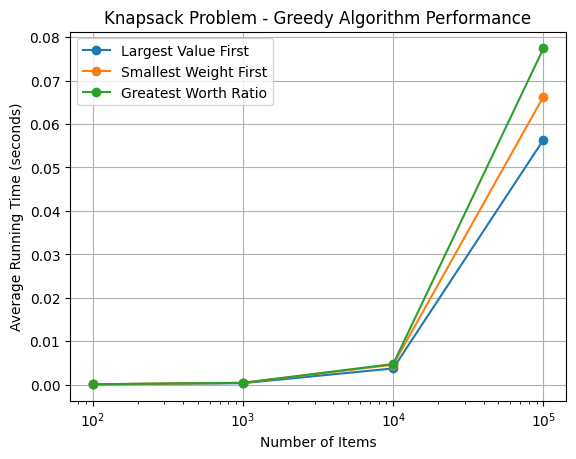

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Generic knapsack function with a key function
def knapsack_greedy(items, max_weight, key_func):
    knapsack, total_weight, total_value = [], 0, 0
    items_sorted = sorted(items, key=key_func, reverse=True)

    for weight, value in items_sorted:
        if total_weight + weight <= max_weight:
            knapsack.append((weight, value))
            total_weight += weight
            total_value += value

    return knapsack, total_weight, total_value

# Algorithm 1: Largest value first
def greedy_algorithm_1(items, max_weight):
    return knapsack_greedy(items, max_weight, key_func=lambda x: x[1])

# Algorithm 2: Smallest weight first
def greedy_algorithm_2(items, max_weight):
    return knapsack_greedy(items, max_weight, key_func=lambda x: -x[0])

# Algorithm 3: Largest worth ratio (value/weight)
def backpack_approximation(items, max_weight):
    return knapsack_greedy(items, max_weight, key_func=lambda x: x[1] / x[0] if x[0] > 0 else 0)

# Run experiments for all algorithms
def run_experiment(algorithm, item_counts, max_weight=1000):
    results = []
    for trial in range(3):  # Three trials
        trial_results = []
        for n in item_counts:
            items = [(random.randint(100, 1500), random.randint(100, 500)) for _ in range(n)]
            start_time = time.time()
            _, _, total_value = algorithm(items, max_weight)
            runtime = time.time() - start_time
            trial_results.append((n, total_value, runtime))
        results.append(trial_results)
    return results

# Print results
def print_experiment_results(results, algorithm_name):
    print(f"\n Results for {algorithm_name} :")
    for trial_index, trial_results in enumerate(results):
        print(f"\nTrial {trial_index + 1}:")
        for n, total_value, runtime in trial_results:
            print(f"n = {n}, Maximum Value = {total_value}, Runtime = {runtime:.4f} seconds")

# Visualize average running times
def visualize_results(results, item_counts, algorithm_name):
    avg_times = [
        sum(trial[i][2] for trial in results) / len(results) for i in range(len(item_counts))
    ]
    plt.plot(item_counts, avg_times, marker='o', label=algorithm_name)
    plt.xlabel("Number of Items")
    plt.ylabel("Average Running Time (seconds)")
    plt.title("Knapsack Problem - Greedy Algorithm Performance")
    plt.xscale("log")
    plt.legend()
    plt.grid()

# Test parameters
item_counts = [100, 1000, 10000,  100000]
max_weight = 1000

# Run and visualize each algorithm
algorithms = [
    ("Largest Value First", greedy_algorithm_1),
    ("Smallest Weight First", greedy_algorithm_2),
    ("Greatest Worth Ratio", backpack_approximation),
]

for algorithm_name, algorithm in algorithms:
    results = run_experiment(algorithm, item_counts, max_weight)
    print_experiment_results(results, algorithm_name)
    visualize_results(results, item_counts, algorithm_name)

# Show plots
plt.show()
